# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('../data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
#clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/rajesh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


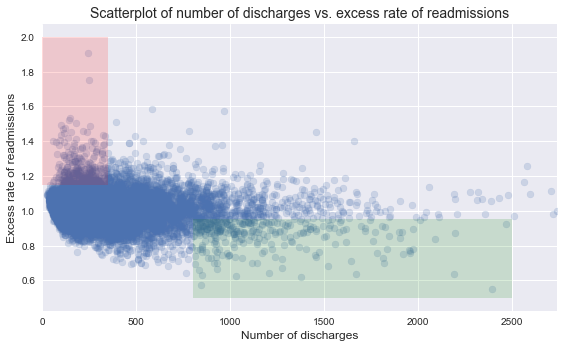

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

### A. Do you agree with the above analysis and recommendations? Why or why not?
   
   No, I do not agree with the analysis as they are based on visual inspection and intuitive guess. Two groups of hospitals/facilitoes have been chosen 1. hospitals with discharges < 100 and 2. hospitals with discharges >1000.  The Statistic measure that has been used for comclusion is the mean excess admission rate. For the hospitals in  group 1, the excess readmission rate is 1.023 vs. 0.978 which is very close to each other.
   The groups need to be partitioned and the differences need to be evaluated if the differences  are statistically significant.
   
   

In [5]:
# Your turn

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
Setup an appropriate hypothesis test.
Compute and report the observed significance value (or p-value).
Report statistical significance for  α
  = .01.
Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

#### Hypothesis test setup

#### NULL HYPOTHESIS : H<sub>0</sub>: mu<sub>1</sub> = mu</sub>2 

There is no difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

#### ALTERNATE HYPOTHESIS : H<sub>1</sub>: mu<sub>1</sub> ≠ mu</sub>2 

There is a significant  difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000      

In [6]:
#clean_hospital_read_df.info()


### Clean up the data 

In [7]:
# lets drop a few rows that have null values 
df2 = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions'])

In [8]:
#df2.info()


### Split into two groups based on number of discharges

In [9]:
 clean_hospitals_less_than_100_discharges= df2[df2['Number of Discharges'] < 100]

In [10]:
 clean_hospitals_less_than_100_discharges.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [11]:
 clean_hospitals_greater_than_1000_discharges= df2[df2['Number of Discharges'] > 1000]

In [12]:
clean_hospitals_greater_than_1000_discharges.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
11757,FLETCHER ALLEN HOSPITAL OF VERMONT,470003,VT,READM-30-AMI-HRRP,1002,NaN,0.9192,14.0,15.2,136.0,07/01/2010,06/30/2013
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,NaN,1.1405,6.1,5.4,64.0,07/01/2010,06/30/2013


### T-test 

In [13]:

Readmission_lt_100 = clean_hospitals_less_than_100_discharges['Excess Readmission Ratio']
Readmission_gt_1000 = clean_hospitals_greater_than_1000_discharges['Excess Readmission Ratio']
result = st.ttest_ind(Readmission_lt_100,Readmission_gt_1000, equal_var=False)
print("The p-value  is {} ".format(result[1]))
print("The t-stat   is {} ".format(result[0]))


 

The p-value  is 1.2752435451140344e-13 
The t-stat   is 7.601742418500486 



### Statistical Significance 
The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 7.6  means that the groups are 7.6  times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

With a p-value of 1.2 e-13 , at a significance level of 0.01, we reject the null hypothesis claim and conclude that **there is a significant difference between the two groups** 



### Visualization   
The scatter-plot (above) shows too much information in too small a space. A better visual would be to provide joint-plots of histograms to see  the number of observations is  skewed towards the hospitals with smaller facilities ( 100-200  Discahrges ).   

The Pearson coefficient shows a negative coorelation of-0.097 

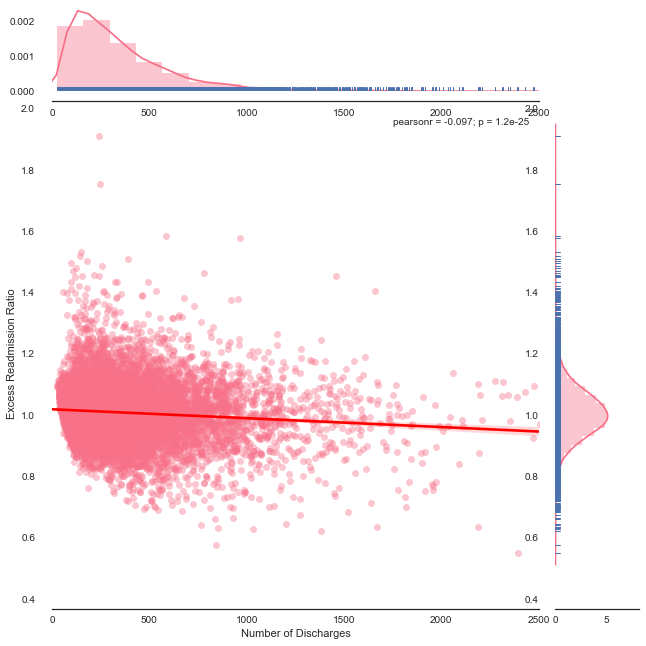

In [14]:
color = sns.color_palette()
sns.set(style="white")
 
plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df2, kind='reg', size=9, 
              xlim=(0,2500), ylim=(0.4,2.0), 
               joint_kws={'line_kws':{'color':'red'}}, 
               scatter_kws={'alpha': 0.4},
              ).plot_marginals(sns.rugplot)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.margins(0.6)

plt.show()


### Conclusion
Statistics such as mean alone should be combined with computed statistical significance of Hypothesis. In this case, the Null hypothesis was rejected in favor of the claim that there is a significant difference in between the two groups and the policy recommendations should  hold.